# Задача классификации

## Описание задачи
Обучение модели для предсказания факта того, является ли человек здоровым или нет.
Данные о здоровье берутся из столбца `Medical Condition` и в качестве статуса "Здоровый" берется `Healthy`.

## Датасет

https://www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset

Датасет содержит 30'000 записей. Выбираем только определённые столбцы:
- `Age` - возраст пациента в годах
- `Gender` - пол пациента (`Male` или `Female`)
- `Medical Condition` - состояние здоровья (`Healthy`, `Diabetes`, `Asthma`, `Obesity`, `Hypertension`, `Cancer`, `Arthritis`)
- `Glucose` - уровень глюкозы (сахара) в крови
- `Blood Pressure` - артериальное давление
- `BMI` - индекс массы тела
- `Oxygen Saturation` - уровень насыщения крови кислородом
- `Cholesterol` - уровень холестерина
- `Triglycerides` - уровень триглицеридов
- `HbA1c` - гемоглобин A1c (гликозилированный гемоглобин)
- `Smoking` - курящий человек (`0` - некурящий, `1` - курящий)
- `Alcohol` - пьющий человек (`0` - непьющий, `1` - пьющий)
- `Physical Activity` - физическая активность (примерное количество часов в неделю)
- `Diet Score` - оценка качества диеты (число)
- `Family History` - семейная история болезней (`0` - нет, `1` - есть)
- `Stress Level` - уровень стресса (число)
- `Sleep hours` - среднее количество часов сна в день

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
prediction_column = "Medical Condition"
prediction_value = "Healthy"
table_category_columns = ["Gender", "Medical Condition"]
table_binary_category_columns = ["Smoking", "Alcohol", "Family History"]
table = pd.read_csv("healthcare_dataset.csv").drop(["random_notes", "noise_col", "LengthOfStay"], axis=1)
table_num_columns = list((set(table.columns.to_list()) - set(table_category_columns)) - set(table_binary_category_columns))
np.random.seed(42)
table

Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0      46.0    Male          Diabetes   137.04          135.27  28.90   
1      22.0    Male           Healthy    71.58          113.27  26.29   
2      50.0     NaN            Asthma    95.24             NaN  22.53   
3      57.0     NaN           Obesity      NaN          130.53  38.47   
4      66.0  Female      Hypertension    95.15          178.17  31.12   
...     ...     ...               ...      ...             ...    ...   
29995  54.0  Female           Healthy    86.35          127.68  28.30   
29996  41.0    Male            Asthma    89.24          154.37  24.93   
29997  83.0  Female               NaN      NaN          170.11  30.55   
29998  41.0    Male          Diabetes   242.87          152.97  23.57   
29999  46.0  Female      Hypertension    86.52          159.26  34.55   

       Oxygen Saturation  Cholesterol  Triglycerides  HbA1c  Smoking  Alcohol  \
0                  96.04       231.88         210.56   7.61        0        0   
1                  97.54       165.57         129.41   4.91        0        0   
2                  90.31       214.94         165.35   5.60        0        0   
3                  96.60       197.71         182.13   6.92        0        0   
4                  94.90       259.53         115.85   5.98        0        1   
...                  ...          ...            ...    ...      ...      ...   
29995              94.36       218.60         152.82   4.85        0        0   
29996              96.07       198.30         176.81   5.36        1        0   
29997              97.83       210.13         168.76   5.05        0        0   
29998              99.17       208.86         224.21   7.59        0        0   
29999              96.60       217.37         141.28   5.77        1        0   

       Physical Activity  Diet Score  Family History  Stress Level  \
0                  -0.20        3.54               0          5.07   
1                   8.12        5.90               0          5.87   
2                   5.01        4.65               1          3.09   
3                   3.16        3.37               0          3.01   
4                   3.56        3.40               0          6.38   
...                  ...         ...             ...           ...   
29995               9.15       10.35               0          3.65   
29996               3.34        3.40               0          6.72   
29997               4.53        4.50               0          4.31   
29998               3.16        2.59               0          7.10   
29999               4.91        5.82               1          3.64   

       Sleep Hours  
0             6.05  
1             7.72  
2             4.82  
3             5.33  
4             6.64  
...            ...  
29995         8.71  
29996         2.81  
29997         3.61  
29998         5.80  
29999         5.47  

[30000 rows x 17 columns]

In [3]:
table.describe()

Age       Glucose  Blood Pressure           BMI  \
count  25500.000000  25500.000000    25500.000000  30000.000000   
mean      54.616784    123.622179      140.455337     28.476155   
std       15.973618     41.576943       21.077933      5.728804   
min       10.000000     20.320000       74.240000      7.670000   
25%       45.000000     96.280000      125.140000     24.590000   
50%       55.000000    110.500000      138.320000     28.050000   
75%       66.000000    136.610000      153.790000     31.810000   
max       89.000000    318.510000      226.380000     56.850000   

       Oxygen Saturation   Cholesterol  Triglycerides         HbA1c  \
count       30000.000000  30000.000000   30000.000000  30000.000000   
mean           94.954992    213.033891     176.837375      6.294377   
std             3.736202     33.519757      48.812827      1.320269   
min            67.510000     95.730000     -22.480000      3.280000   
25%            93.000000    189.500000     141.280000      5.330000   
50%            95.300000    211.835000     173.365000      5.970000   
75%            97.380000    235.310000     208.630000      6.920000   
max           110.070000    358.370000     421.510000     12.360000   

            Smoking       Alcohol  Physical Activity    Diet Score  \
count  30000.000000  30000.000000       30000.000000  30000.000000   
mean       0.279767      0.238533           3.803214      4.029654   
std        0.448892      0.426194           2.011729      1.817165   
min        0.000000      0.000000          -3.680000     -1.750000   
25%        0.000000      0.000000           2.350000      2.770000   
50%        0.000000      0.000000           3.590000      3.790000   
75%        1.000000      0.000000           5.060000      5.020000   
max        1.000000      1.000000          12.410000     12.060000   

       Family History  Stress Level   Sleep Hours  
count    30000.000000  30000.000000  30000.000000  
mean         0.439433      5.917312      6.229836  
std          0.496326      2.225057      1.187669  
min          0.000000     -2.440000      1.590000  
25%          0.000000      4.370000      5.410000  
50%          0.000000      5.900000      6.230000  
75%          1.000000      7.440000      7.050000  
max          1.000000     15.450000     10.350000

In [4]:
table.loc[:, ["Gender", "Medical Condition"]].describe()

Gender Medical Condition
count    25500             25500
unique       2                 7
top     Female      Hypertension
freq     12865              7120

In [5]:
table.loc[:, ["Medical Condition"]].value_counts(normalize=True)

Medical Condition
Hypertension         0.279216
Diabetes             0.251647
Obesity              0.151255
Healthy              0.119176
Asthma               0.079882
Arthritis            0.070431
Cancer               0.048392
Name: proportion, dtype: float64

In [6]:
table.describe()

Age       Glucose  Blood Pressure           BMI  \
count  25500.000000  25500.000000    25500.000000  30000.000000   
mean      54.616784    123.622179      140.455337     28.476155   
std       15.973618     41.576943       21.077933      5.728804   
min       10.000000     20.320000       74.240000      7.670000   
25%       45.000000     96.280000      125.140000     24.590000   
50%       55.000000    110.500000      138.320000     28.050000   
75%       66.000000    136.610000      153.790000     31.810000   
max       89.000000    318.510000      226.380000     56.850000   

       Oxygen Saturation   Cholesterol  Triglycerides         HbA1c  \
count       30000.000000  30000.000000   30000.000000  30000.000000   
mean           94.954992    213.033891     176.837375      6.294377   
std             3.736202     33.519757      48.812827      1.320269   
min            67.510000     95.730000     -22.480000      3.280000   
25%            93.000000    189.500000     141.280000      5.330000   
50%            95.300000    211.835000     173.365000      5.970000   
75%            97.380000    235.310000     208.630000      6.920000   
max           110.070000    358.370000     421.510000     12.360000   

            Smoking       Alcohol  Physical Activity    Diet Score  \
count  30000.000000  30000.000000       30000.000000  30000.000000   
mean       0.279767      0.238533           3.803214      4.029654   
std        0.448892      0.426194           2.011729      1.817165   
min        0.000000      0.000000          -3.680000     -1.750000   
25%        0.000000      0.000000           2.350000      2.770000   
50%        0.000000      0.000000           3.590000      3.790000   
75%        1.000000      0.000000           5.060000      5.020000   
max        1.000000      1.000000          12.410000     12.060000   

       Family History  Stress Level   Sleep Hours  
count    30000.000000  30000.000000  30000.000000  
mean         0.439433      5.917312      6.229836  
std          0.496326      2.225057      1.187669  
min          0.000000     -2.440000      1.590000  
25%          0.000000      4.370000      5.410000  
50%          0.000000      5.900000      6.230000  
75%          1.000000      7.440000      7.050000  
max          1.000000     15.450000     10.350000

### Избавляемся от некорректных значений

Считаем, что отрицательное значение этих столбцов - пропущенные значения

In [7]:
for e in ("Physical Activity", "Triglycerides", "Stress Level", "Diet Score"):
    table[e] = table[e].mask(table[e] < 0.0, np.nan)

### Пропущенные значения для рассматриваемого признака

In [8]:
table.isna().sum()[table.isna().sum() > 0]

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
Triglycerides           4
Physical Activity     302
Diet Score            105
Stress Level           67
dtype: int64

In [9]:
table = table.dropna(subset=[prediction_column])

In [10]:
table.isna().sum()[table.isna().sum() > 0]

Age                  3821
Gender               3794
Glucose              3788
Blood Pressure       3800
Triglycerides           4
Physical Activity     268
Diet Score             87
Stress Level           55
dtype: int64

### Рассмотрим выбросы

In [11]:
table_small = table.loc[:, table_num_columns]
for v in table_num_columns:
    table_small = table_small[table_small[v] != ""]
table_small = table_small.astype(np.float64)
z_scores = np.abs((table_small - table_small.mean()) / table_small.std())
table_small["OUTLIER"] = z_scores.apply(lambda row: 'Yes' if any(row > 3) else 'No', axis=1)
table_small["OUTLIER"].value_counts(normalize=True)

OUTLIER
No     0.940863
Yes    0.059137
Name: proportion, dtype: float64

Выбросов немного, оставим как есть.

### Добавим столбец `Healthy`

In [12]:
table_copy = table.copy()
table_copy.loc[:, prediction_value] = (table[prediction_column] == prediction_value).astype(np.int64)
table = table_copy

table_binary_category_columns.append(prediction_value)
table

Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0      46.0    Male          Diabetes   137.04          135.27  28.90   
1      22.0    Male           Healthy    71.58          113.27  26.29   
2      50.0     NaN            Asthma    95.24             NaN  22.53   
3      57.0     NaN           Obesity      NaN          130.53  38.47   
4      66.0  Female      Hypertension    95.15          178.17  31.12   
...     ...     ...               ...      ...             ...    ...   
29994  76.0     NaN      Hypertension    97.17          138.92  25.65   
29995  54.0  Female           Healthy    86.35          127.68  28.30   
29996  41.0    Male            Asthma    89.24          154.37  24.93   
29998  41.0    Male          Diabetes   242.87          152.97  23.57   
29999  46.0  Female      Hypertension    86.52          159.26  34.55   

       Oxygen Saturation  Cholesterol  Triglycerides  HbA1c  Smoking  Alcohol  \
0                  96.04       231.88         210.56   7.61        0        0   
1                  97.54       165.57         129.41   4.91        0        0   
2                  90.31       214.94         165.35   5.60        0        0   
3                  96.60       197.71         182.13   6.92        0        0   
4                  94.90       259.53         115.85   5.98        0        1   
...                  ...          ...            ...    ...      ...      ...   
29994              93.99       235.65         238.26   6.43        0        0   
29995              94.36       218.60         152.82   4.85        0        0   
29996              96.07       198.30         176.81   5.36        1        0   
29998              99.17       208.86         224.21   7.59        0        0   
29999              96.60       217.37         141.28   5.77        1        0   

       Physical Activity  Diet Score  Family History  Stress Level  \
0                    NaN        3.54               0          5.07   
1                   8.12        5.90               0          5.87   
2                   5.01        4.65               1          3.09   
3                   3.16        3.37               0          3.01   
4                   3.56        3.40               0          6.38   
...                  ...         ...             ...           ...   
29994               3.14        3.46               0          6.66   
29995               9.15       10.35               0          3.65   
29996               3.34        3.40               0          6.72   
29998               3.16        2.59               0          7.10   
29999               4.91        5.82               1          3.64   

       Sleep Hours  Healthy  
0             6.05        0  
1             7.72        1  
2             4.82        0  
3             5.33        0  
4             6.64        0  
...            ...      ...  
29994         6.10        0  
29995         8.71        1  
29996         2.81        0  
29998         5.80        0  
29999         5.47        0  

[25500 rows x 18 columns]

## Визуализация данных

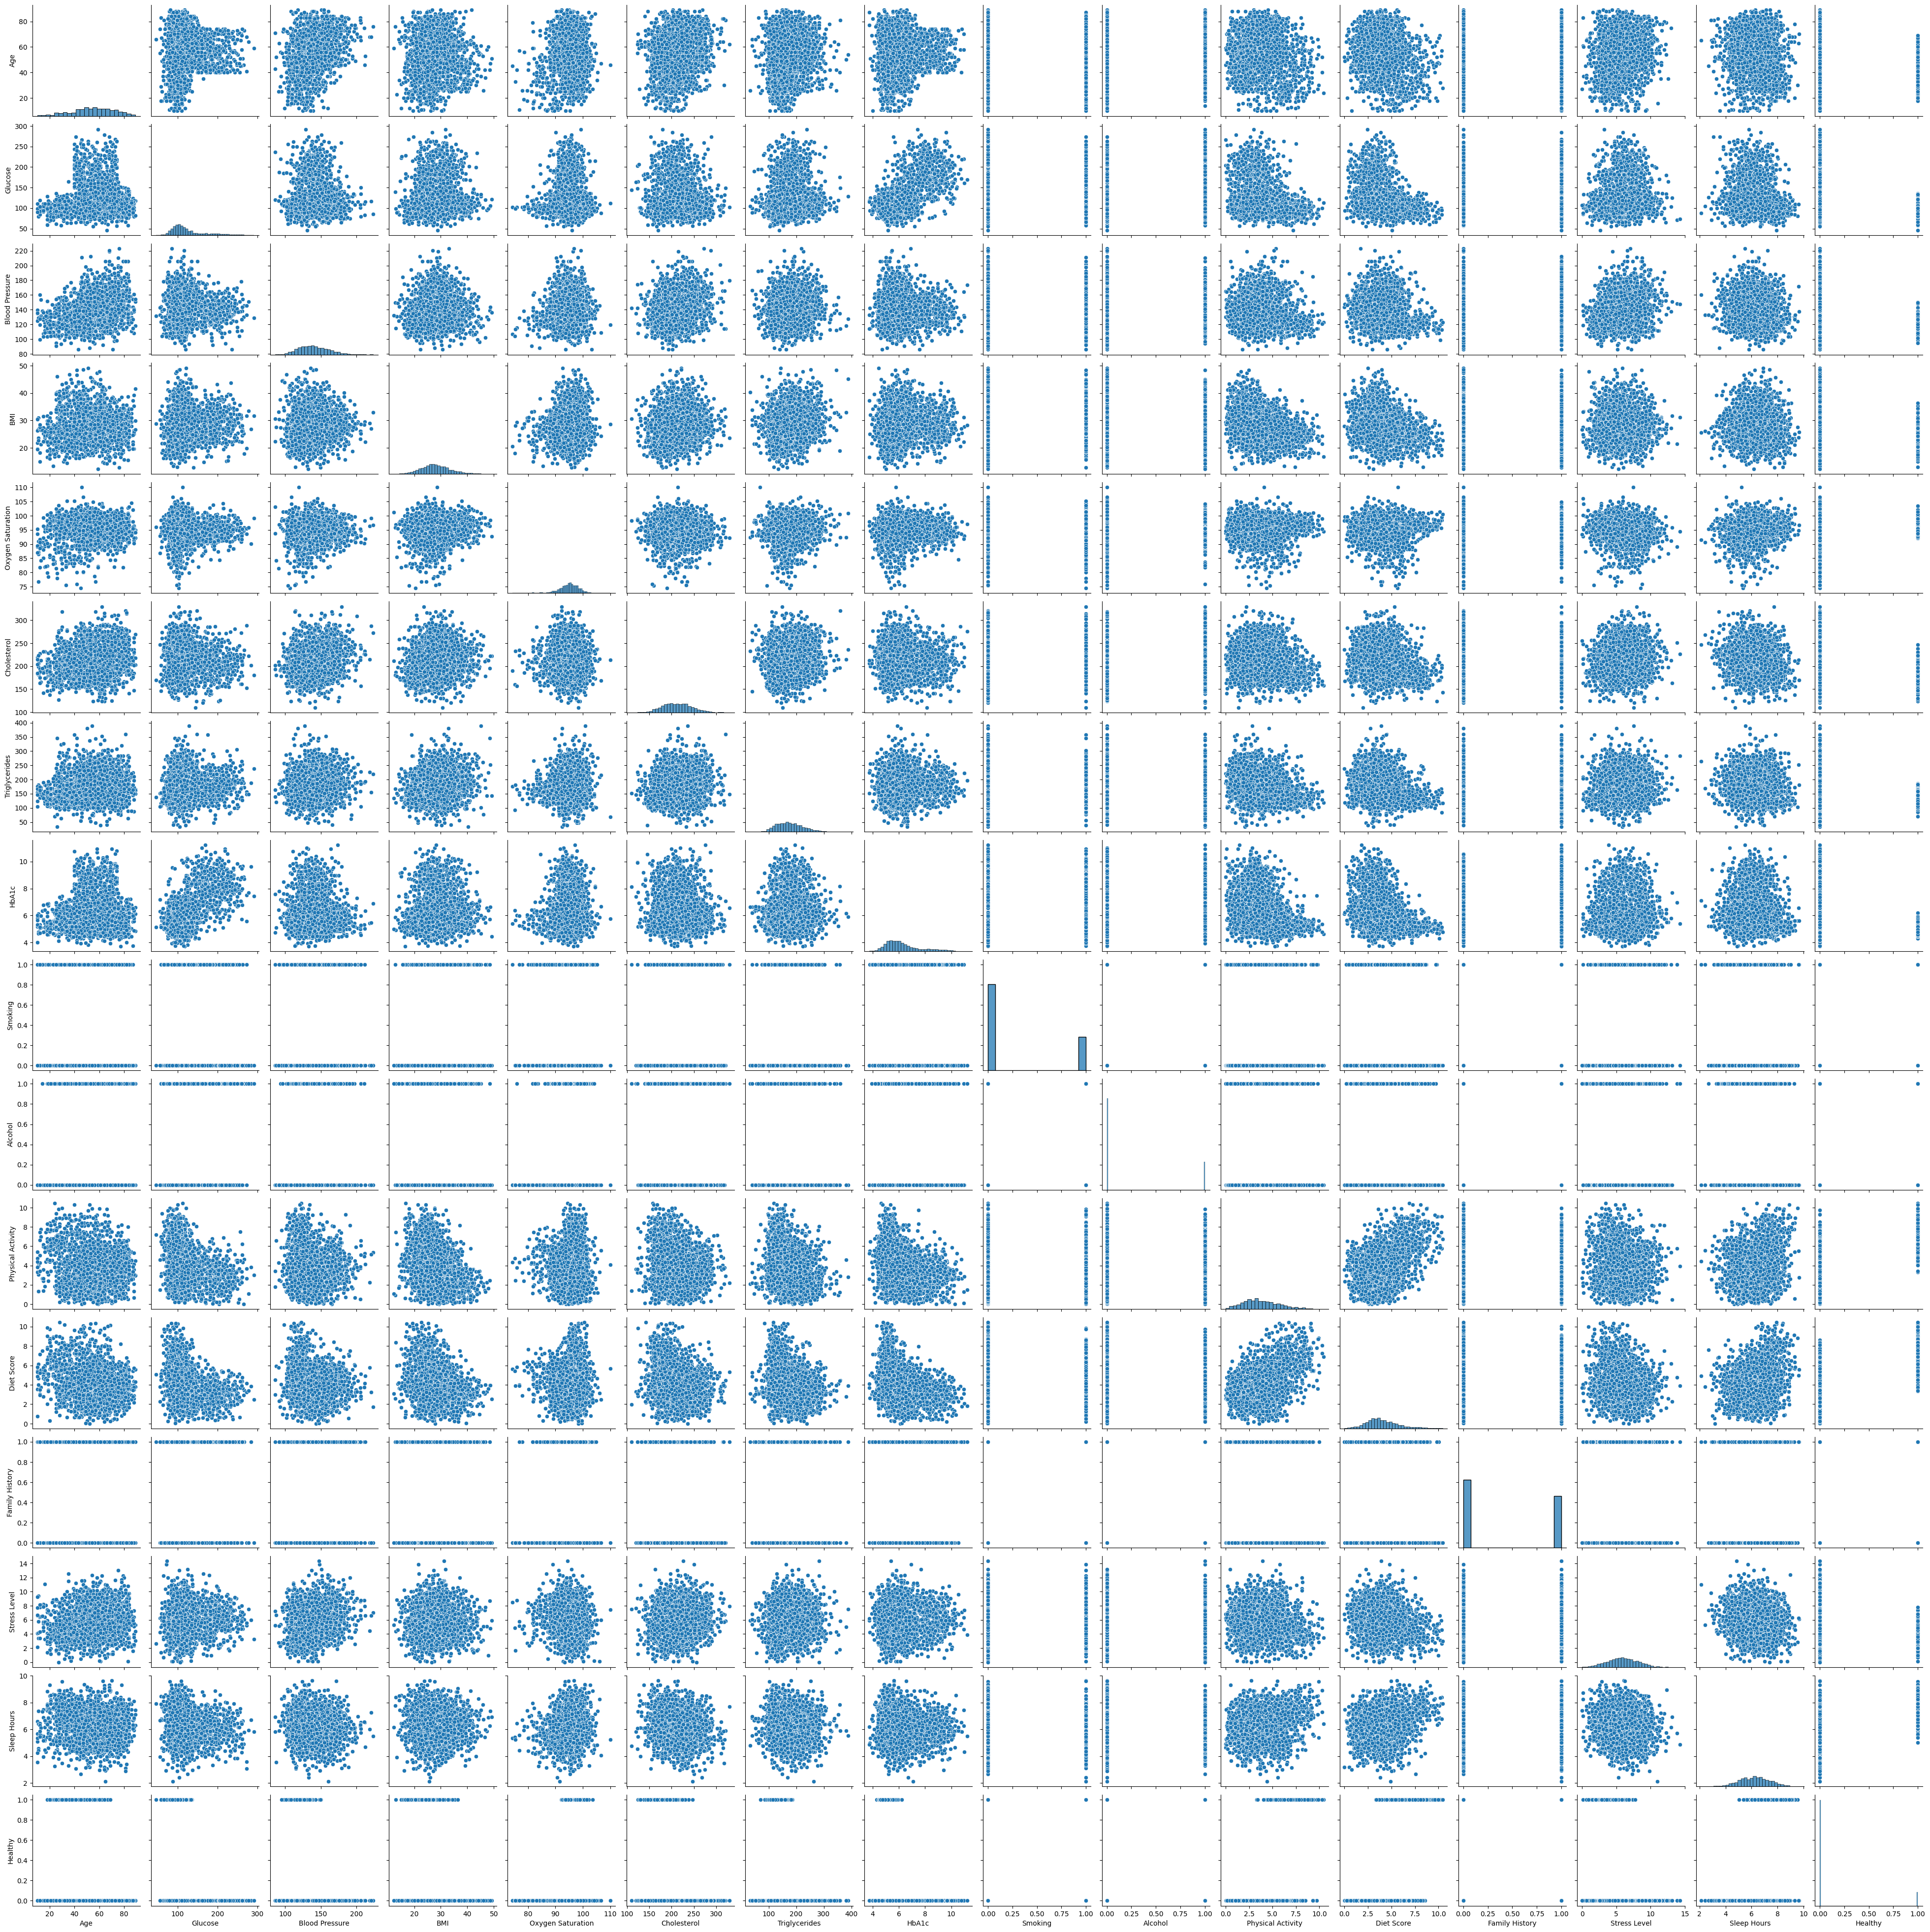

In [13]:
random_subset = np.random.choice(np.arange(table.shape[0]), size=2500, replace=False)
sns.pairplot(table.iloc[random_subset], diag_kind="hist")
pass

In [14]:
corr_mat = table.drop(table_category_columns, axis=1).corr()
corr_mat

Age   Glucose  Blood Pressure       BMI  \
Age                1.000000  0.115983        0.327118 -0.009664   
Glucose            0.115983  1.000000        0.058804  0.074702   
Blood Pressure     0.327118  0.058804        1.000000  0.073727   
BMI               -0.009664  0.074702        0.073727  1.000000   
Oxygen Saturation  0.078976  0.001647        0.009905  0.062100   
Cholesterol        0.174955  0.005123        0.259596  0.126410   
Triglycerides      0.106685  0.068540        0.187551  0.185290   
HbA1c              0.099756  0.615178        0.046559  0.127995   
Smoking            0.057789 -0.043869        0.116172 -0.004652   
Alcohol            0.041016 -0.024385        0.066734  0.041548   
Physical Activity -0.128372 -0.229001       -0.143427 -0.346574   
Diet Score        -0.165864 -0.309258       -0.194936 -0.300353   
Family History     0.118704  0.156363        0.112041  0.058945   
Stress Level       0.170565  0.071369        0.228178 -0.009633   
Sleep Hours       -0.078389 -0.126685       -0.149636 -0.023638   
Healthy           -0.258864 -0.257930       -0.352804 -0.294288   

                   Oxygen Saturation  Cholesterol  Triglycerides     HbA1c  \
Age                         0.078976     0.174955       0.106685  0.099756   
Glucose                     0.001647     0.005123       0.068540  0.615178   
Blood Pressure              0.009905     0.259596       0.187551  0.046559   
BMI                         0.062100     0.126410       0.185290  0.127995   
Oxygen Saturation           1.000000    -0.024648      -0.009129 -0.006818   
Cholesterol                -0.024648     1.000000       0.179418  0.023936   
Triglycerides              -0.009129     0.179418       1.000000  0.091173   
HbA1c                      -0.006818     0.023936       0.091173  1.000000   
Smoking                    -0.044558     0.082398       0.053233 -0.043611   
Alcohol                     0.014423     0.066727       0.049715 -0.014213   
Physical Activity          -0.016942    -0.210329      -0.261818 -0.279458   
Diet Score                  0.029095    -0.222102      -0.257703 -0.345717   
Family History             -0.001016     0.072020       0.064698  0.153941   
Stress Level               -0.105114     0.166227       0.103338  0.058750   
Sleep Hours                 0.169837    -0.137577      -0.114179 -0.122934   
Healthy                     0.197352    -0.371187      -0.356321 -0.306197   

                    Smoking   Alcohol  Physical Activity  Diet Score  \
Age                0.057789  0.041016          -0.128372   -0.165864   
Glucose           -0.043869 -0.024385          -0.229001   -0.309258   
Blood Pressure     0.116172  0.066734          -0.143427   -0.194936   
BMI               -0.004652  0.041548          -0.346574   -0.300353   
Oxygen Saturation -0.044558  0.014423          -0.016942    0.029095   
Cholesterol        0.082398  0.066727          -0.210329   -0.222102   
Triglycerides      0.053233  0.049715          -0.261818   -0.257703   
HbA1c             -0.043611 -0.014213          -0.279458   -0.345717   
Smoking            1.000000  0.032120          -0.024485   -0.037386   
Alcohol            0.032120  1.000000          -0.054123   -0.052850   
Physical Activity -0.024485 -0.054123           1.000000    0.472503   
Diet Score        -0.037386 -0.052850           0.472503    1.000000   
Family History     0.019137  0.014880          -0.123192   -0.152598   
Stress Level       0.107116  0.041629          -0.088413   -0.139604   
Sleep Hours       -0.085140 -0.025912           0.147955    0.197492   
Healthy           -0.141148 -0.074536           0.588402    0.604682   

                   Family History  Stress Level  Sleep Hours   Healthy  
Age                      0.118704      0.170565    -0.078389 -0.258864  
Glucose                  0.156363      0.071369    -0.126685 -0.257930  
Blood Pressure           0.112041      0.228178    -0.149636 -0.352804  
BMI                      0.058945     -0

<Axes: >

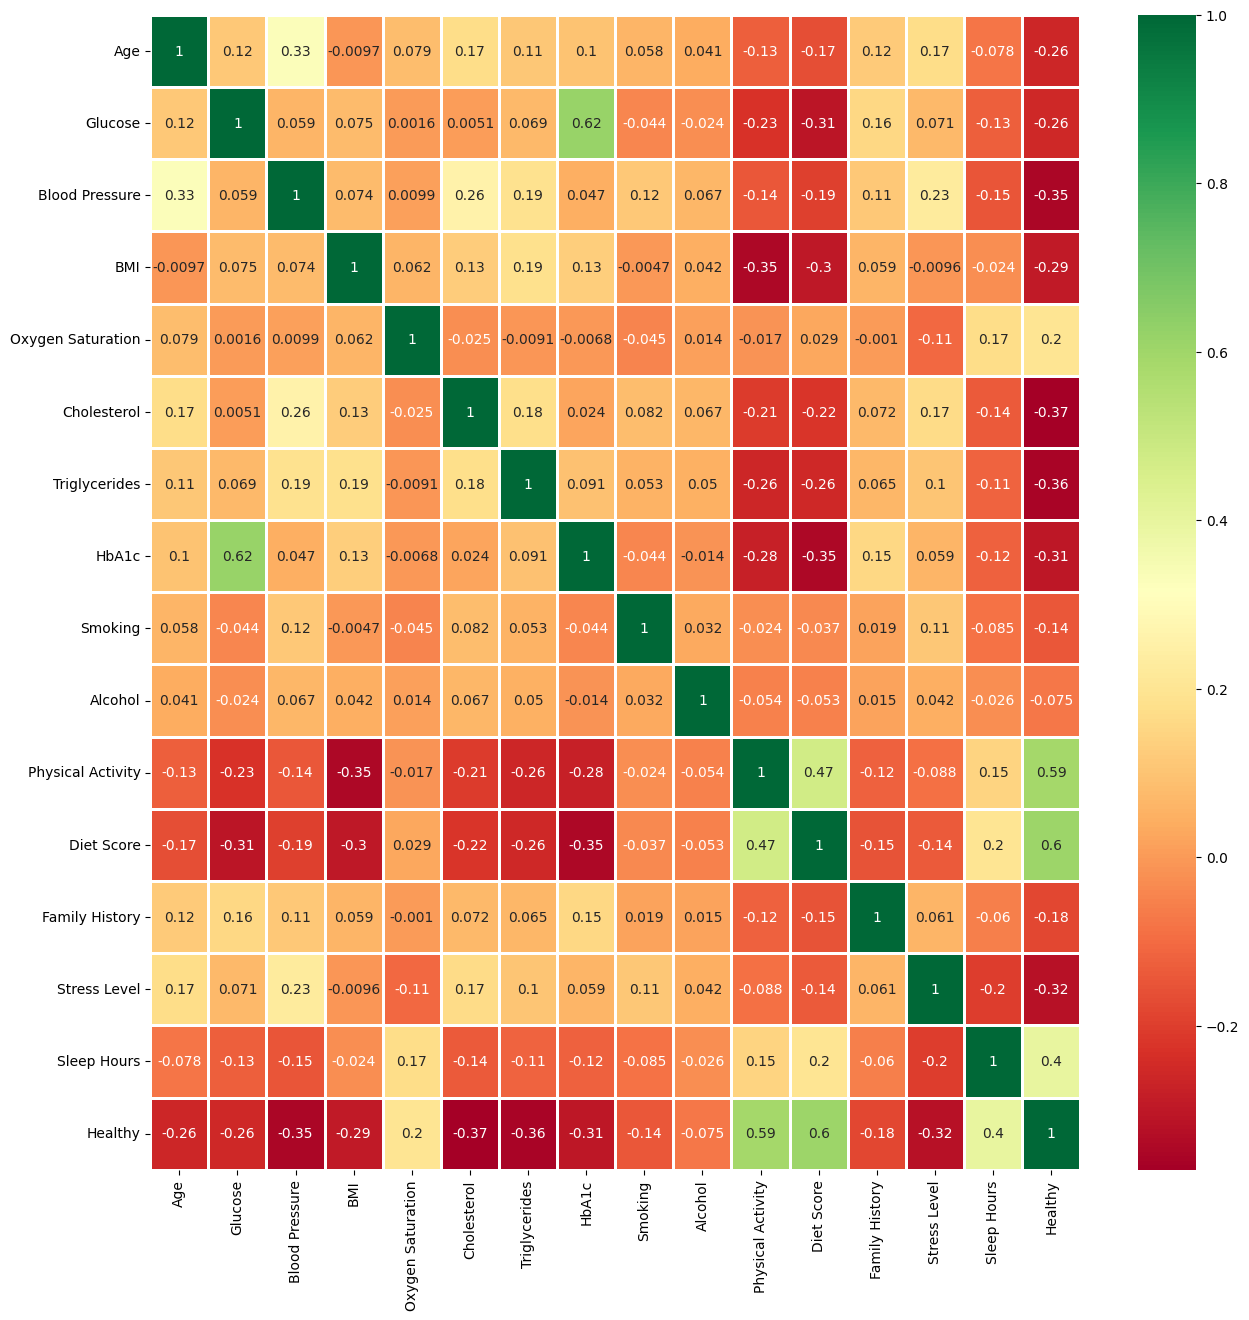

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, cmap ='RdYlGn', linewidths=1, annot=True)

Видно, что `Healthy` сильно коррелирует с `Diet Score` и `Physical Activity`. Эти столбцы стоит убрать, иначе классификатор будет слишком сильно опираться именно на них.

In [16]:
values_too_correlate = ["Diet Score", "Physical Activity"]

## Остальные пропущенные значения
Категориальные заменим на моду, а числовые - на медиану.

In [17]:
for e in table_category_columns:
    table.loc[:, e] = table[e].fillna(table[e].mode()[0])

In [18]:
for e in table_num_columns:
    table.loc[:, e] = table[e].fillna(table[e].median())

In [19]:
table.isna().sum()[table.isna().sum() > 0]

Series([], dtype: int64)

In [20]:
table

Age  Gender Medical Condition  Glucose  Blood Pressure    BMI  \
0      46.0    Male          Diabetes   137.04         135.270  28.90   
1      22.0    Male           Healthy    71.58         113.270  26.29   
2      50.0  Female            Asthma    95.24         138.285  22.53   
3      57.0  Female           Obesity   110.51         130.530  38.47   
4      66.0  Female      Hypertension    95.15         178.170  31.12   
...     ...     ...               ...      ...             ...    ...   
29994  76.0  Female      Hypertension    97.17         138.920  25.65   
29995  54.0  Female           Healthy    86.35         127.680  28.30   
29996  41.0    Male            Asthma    89.24         154.370  24.93   
29998  41.0    Male          Diabetes   242.87         152.970  23.57   
29999  46.0  Female      Hypertension    86.52         159.260  34.55   

       Oxygen Saturation  Cholesterol  Triglycerides  HbA1c  Smoking  Alcohol  \
0                  96.04       231.88         210.56   7.61        0        0   
1                  97.54       165.57         129.41   4.91        0        0   
2                  90.31       214.94         165.35   5.60        0        0   
3                  96.60       197.71         182.13   6.92        0        0   
4                  94.90       259.53         115.85   5.98        0        1   
...                  ...          ...            ...    ...      ...      ...   
29994              93.99       235.65         238.26   6.43        0        0   
29995              94.36       218.60         152.82   4.85        0        0   
29996              96.07       198.30         176.81   5.36        1        0   
29998              99.17       208.86         224.21   7.59        0        0   
29999              96.60       217.37         141.28   5.77        1        0   

       Physical Activity  Diet Score  Family History  Stress Level  \
0                   3.62        3.54               0          5.07   
1                   8.12        5.90               0          5.87   
2                   5.01        4.65               1          3.09   
3                   3.16        3.37               0          3.01   
4                   3.56        3.40               0          6.38   
...                  ...         ...             ...           ...   
29994               3.14        3.46               0          6.66   
29995               9.15       10.35               0          3.65   
29996               3.34        3.40               0          6.72   
29998               3.16        2.59               0          7.10   
29999               4.91        5.82               1          3.64   

       Sleep Hours  Healthy  
0             6.05        0  
1             7.72        1  
2             4.82        0  
3             5.33        0  
4             6.64        0  
...            ...      ...  
29994         6.10        0  
29995         8.71        1  
29996         2.81        0  
29998         5.80        0  
29999         5.47        0  

[25500 rows x 18 columns]

## Векторизация категориальных признаков

In [21]:
table = pd.get_dummies(table, columns=["Gender"], drop_first=True, dtype=np.int64)
table

Age Medical Condition  Glucose  Blood Pressure    BMI  \
0      46.0          Diabetes   137.04         135.270  28.90   
1      22.0           Healthy    71.58         113.270  26.29   
2      50.0            Asthma    95.24         138.285  22.53   
3      57.0           Obesity   110.51         130.530  38.47   
4      66.0      Hypertension    95.15         178.170  31.12   
...     ...               ...      ...             ...    ...   
29994  76.0      Hypertension    97.17         138.920  25.65   
29995  54.0           Healthy    86.35         127.680  28.30   
29996  41.0            Asthma    89.24         154.370  24.93   
29998  41.0          Diabetes   242.87         152.970  23.57   
29999  46.0      Hypertension    86.52         159.260  34.55   

       Oxygen Saturation  Cholesterol  Triglycerides  HbA1c  Smoking  Alcohol  \
0                  96.04       231.88         210.56   7.61        0        0   
1                  97.54       165.57         129.41   4.91        0        0   
2                  90.31       214.94         165.35   5.60        0        0   
3                  96.60       197.71         182.13   6.92        0        0   
4                  94.90       259.53         115.85   5.98        0        1   
...                  ...          ...            ...    ...      ...      ...   
29994              93.99       235.65         238.26   6.43        0        0   
29995              94.36       218.60         152.82   4.85        0        0   
29996              96.07       198.30         176.81   5.36        1        0   
29998              99.17       208.86         224.21   7.59        0        0   
29999              96.60       217.37         141.28   5.77        1        0   

       Physical Activity  Diet Score  Family History  Stress Level  \
0                   3.62        3.54               0          5.07   
1                   8.12        5.90               0          5.87   
2                   5.01        4.65               1          3.09   
3                   3.16        3.37               0          3.01   
4                   3.56        3.40               0          6.38   
...                  ...         ...             ...           ...   
29994               3.14        3.46               0          6.66   
29995               9.15       10.35               0          3.65   
29996               3.34        3.40               0          6.72   
29998               3.16        2.59               0          7.10   
29999               4.91        5.82               1          3.64   

       Sleep Hours  Healthy  Gender_Male  
0             6.05        0            1  
1             7.72        1            1  
2             4.82        0            0  
3             5.33        0            0  
4             6.64        0            0  
...            ...      ...          ...  
29994         6.10        0            0  
29995         8.71        1            0  
29996         2.81        0            1  
29998         5.80        0            1  
29999         5.47        0            0  

[25500 rows x 18 columns]

## Избавляемся от `Medical Condition` в пользу `Healthy`

In [22]:
table = table.drop([prediction_column], axis=1)
table_category_columns.remove(prediction_column)

## Нормализация количественных признаков

In [23]:
table_num_data = table[table_num_columns]
table_num_data.describe()

Triglycerides         HbA1c  Oxygen Saturation  Physical Activity  \
count   25500.000000  25500.000000       25500.000000       25500.000000   
mean      176.939347      6.292121          94.950878           3.850585   
std        48.746639      1.318946           3.742507           1.961364   
min         1.140000      3.280000          67.510000           0.000000   
25%       141.437500      5.330000          92.990000           2.417500   
50%       173.540000      5.970000          95.300000           3.620000   
75%       208.422500      6.910000          97.380000           5.080000   
max       421.510000     12.360000         110.070000          12.410000   

       Stress Level       Glucose    Diet Score  Blood Pressure           Age  \
count  25500.000000  25500.000000  25500.000000    25500.000000  25500.000000   
mean       5.935951    121.638633      4.049707      140.125296     54.696275   
std        2.201393     38.549153      1.802786       19.499998     14.719259   
min       -0.000000     20.320000      0.000000       74.240000     10.000000   
25%        4.390000     98.780000      2.790000      127.640000     47.000000   
50%        5.910000    110.510000      3.800000      138.285000     55.000000   
75%        7.442500    128.870000      5.030000      150.780000     64.000000   
max       15.450000    318.510000     12.060000      226.380000     89.000000   

        Cholesterol           BMI   Sleep Hours  
count  25500.000000  25500.000000  25500.000000  
mean     213.072891     28.474939      6.231123  
std       33.616404      5.727344      1.188446  
min       95.730000      7.670000      1.590000  
25%      189.410000     24.590000      5.420000  
50%      211.760000     28.050000      6.230000  
75%      235.370000     31.830000      7.050000  
max      355.270000     56.850000     10.350000

In [24]:
table_num_data = (table_num_data - table_num_data.mean(axis = 0))/table_num_data.std(axis = 0)
table_num_data.describe()

Triglycerides         HbA1c  Oxygen Saturation  Physical Activity  \
count   2.550000e+04  2.550000e+04       2.550000e+04       2.550000e+04   
mean    2.452069e-17 -8.164275e-16       1.648459e-15       6.576003e-17   
std     1.000000e+00  1.000000e+00       1.000000e+00       1.000000e+00   
min    -3.606389e+00 -2.283732e+00      -7.332218e+00      -1.963218e+00   
25%    -7.282932e-01 -7.294616e-01      -5.239476e-01      -7.306575e-01   
50%    -6.973500e-02 -2.442258e-01       9.328569e-02      -1.175637e-01   
75%     6.458528e-01  4.684642e-01       6.490629e-01       6.268164e-01   
max     5.017180e+00  4.600550e+00       4.039838e+00       4.364012e+00   

       Stress Level       Glucose    Diet Score  Blood Pressure           Age  \
count  2.550000e+04  2.550000e+04  2.550000e+04    2.550000e+04  2.550000e+04   
mean   3.141713e-16  7.467665e-17 -1.999272e-16   -1.454523e-16  5.740071e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00    1.000000e+00  1.000000e+00   
min   -2.696452e+00 -2.628297e+00 -2.246361e+00   -3.378733e+00 -3.036584e+00   
25%   -7.022601e-01 -5.929737e-01 -6.987559e-01   -6.402716e-01 -5.228710e-01   
50%   -1.178826e-02 -2.886868e-01 -1.385118e-01   -9.437415e-02  2.063456e-02   
75%    6.843618e-01  1.875882e-01  5.437657e-01    5.463951e-01  6.320784e-01   
max    4.321831e+00  5.107022e+00  4.443286e+00    4.423319e+00  2.330533e+00   

        Cholesterol           BMI   Sleep Hours  
count  2.550000e+04  2.550000e+04  2.550000e+04  
mean   3.404336e-16  3.315866e-16 -6.659597e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -3.490644e+00 -3.632563e+00 -3.905203e+00  
25%   -7.039091e-01 -6.783142e-01 -6.825073e-01  
50%   -3.905507e-02 -7.419474e-02 -9.450469e-04  
75%    6.632806e-01  5.857970e-01  6.890316e-01  
max    4.229992e+00  4.954314e+00  3.465767e+00

In [25]:
table_num_data

Triglycerides     HbA1c  Oxygen Saturation  Physical Activity  \
0           0.689702  0.999191           0.291014          -0.117564   
1          -0.975028 -1.047898           0.691815           2.176758   
2          -0.237747 -0.524753          -1.240045           0.591127   
3           0.106482  0.476046           0.440646          -0.352094   
4          -1.253201 -0.236644          -0.013595          -0.148155   
...              ...       ...                ...                ...   
29994       1.257946  0.104537          -0.256747          -0.362291   
29995      -0.494790 -1.093388          -0.157883           2.701903   
29996      -0.002653 -0.706716           0.299030          -0.260321   
29998       0.969721  0.984027           1.127352          -0.352094   
29999      -0.731524 -0.395862           0.440646           0.540142   

       Stress Level   Glucose  Diet Score  Blood Pressure       Age  \
0         -0.393365  0.399525   -0.282733       -0.248990 -0.590809   
1         -0.029959 -1.298566    1.026352       -1.377195 -2.221326   
2         -1.292795 -0.684805    0.332981       -0.094374 -0.319056   
3         -1.329136 -0.288687   -0.377032       -0.492066  0.156511   
4          0.201713 -0.687139   -0.360391        1.951011  0.767955   
...             ...       ...         ...             ...       ...   
29994      0.328905 -0.634739   -0.327109       -0.061810  1.447337   
29995     -1.038411 -0.915419    3.494754       -0.638220 -0.047304   
29996      0.356161 -0.840450   -0.360391        0.730498 -0.930500   
29998      0.528779  3.144852   -0.809695        0.658703 -0.930500   
29999     -1.042953 -0.911009    0.981976        0.981267 -0.590809   

       Cholesterol       BMI  Sleep Hours  
0         0.559462  0.074216    -0.152403  
1        -1.413087 -0.381493     1.252793  
2         0.055542 -1.037992    -1.187368  
3        -0.457006  1.745148    -0.758236  
4         1.381977  0.461830     0.344043  
...            ...       ...          ...  
29994     0.671610 -0.493237    -0.110332  
29995     0.164417 -0.030544     2.085813  
29996    -0.439455 -0.618950    -2.878652  
29998    -0.125322 -0.856407    -0.362762  
29999     0.127828  1.060712    -0.640436  

[25500 rows x 12 columns]

In [26]:
table_normalized = pd.concat([table.drop(columns=table_num_columns), table_num_data], axis=1)
table_normalized

Smoking  Alcohol  Family History  Healthy  Gender_Male  Triglycerides  \
0            0        0               0        0            1       0.689702   
1            0        0               0        1            1      -0.975028   
2            0        0               1        0            0      -0.237747   
3            0        0               0        0            0       0.106482   
4            0        1               0        0            0      -1.253201   
...        ...      ...             ...      ...          ...            ...   
29994        0        0               0        0            0       1.257946   
29995        0        0               0        1            0      -0.494790   
29996        1        0               0        0            1      -0.002653   
29998        0        0               0        0            1       0.969721   
29999        1        0               1        0            0      -0.731524   

          HbA1c  Oxygen Saturation  Physical Activity  Stress Level   Glucose  \
0      0.999191           0.291014          -0.117564     -0.393365  0.399525   
1     -1.047898           0.691815           2.176758     -0.029959 -1.298566   
2     -0.524753          -1.240045           0.591127     -1.292795 -0.684805   
3      0.476046           0.440646          -0.352094     -1.329136 -0.288687   
4     -0.236644          -0.013595          -0.148155      0.201713 -0.687139   
...         ...                ...                ...           ...       ...   
29994  0.104537          -0.256747          -0.362291      0.328905 -0.634739   
29995 -1.093388          -0.157883           2.701903     -1.038411 -0.915419   
29996 -0.706716           0.299030          -0.260321      0.356161 -0.840450   
29998  0.984027           1.127352          -0.352094      0.528779  3.144852   
29999 -0.395862           0.440646           0.540142     -1.042953 -0.911009   

       Diet Score  Blood Pressure       Age  Cholesterol       BMI  \
0       -0.282733       -0.248990 -0.590809     0.559462  0.074216   
1        1.026352       -1.377195 -2.221326    -1.413087 -0.381493   
2        0.332981       -0.094374 -0.319056     0.055542 -1.037992   
3       -0.377032       -0.492066  0.156511    -0.457006  1.745148   
4       -0.360391        1.951011  0.767955     1.381977  0.461830   
...           ...             ...       ...          ...       ...   
29994   -0.327109       -0.061810  1.447337     0.671610 -0.493237   
29995    3.494754       -0.638220 -0.047304     0.164417 -0.030544   
29996   -0.360391        0.730498 -0.930500    -0.439455 -0.618950   
29998   -0.809695        0.658703 -0.930500    -0.125322 -0.856407   
29999    0.981976        0.981267 -0.590809     0.127828  1.060712   

       Sleep Hours  
0        -0.152403  
1         1.252793  
2        -1.187368  
3        -0.758236  
4         0.344043  
...            ...  
29994    -0.110332  
29995     2.085813  
29996    -2.878652  
29998    -0.362762  
29999    -0.640436  

[25500 rows x 17 columns]

## Random Forest
Используется RF потому, что он хорошо работает с выбросами и с несбалансированными классами. Также ему не нужна нормализация количественных признаков.

### X и y

In [27]:
X = table.drop(columns=[prediction_value] + values_too_correlate, errors="ignore")
y = table[prediction_value]
#y = y.to_numpy()
feature_names = X.columns
#X = X.to_numpy()
N, d = X.shape

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

(N_train, N_test)

(20400, 5100)

In [29]:
pd.DataFrame(y_train).describe()

Healthy
count  20400.000000
mean       0.119167
std        0.323992
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

### Предварительная балансировка (не требуется)

In [30]:
X_train_balanced, y_train_balanced = (X_train, y_train)

In [31]:
pd.DataFrame(y_train_balanced).describe()

Healthy
count  20400.000000
mean       0.119167
std        0.323992
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

### Классификация

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced", min_samples_leaf=1, n_jobs=-1)
rf.fit(X_train_balanced, y_train_balanced)

y_train_pred = rf.predict(X_train_balanced)
y_test_pred = rf.predict(X_test)

### Оценка

In [33]:
err_train = np.mean(y_train != rf.predict(X_train_balanced))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.013725490196078431


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4492
           1       0.96      0.92      0.94       608

    accuracy                           0.99      5100
   macro avg       0.98      0.96      0.97      5100
weighted avg       0.99      0.99      0.99      5100



In [35]:
np.sum(rf.feature_importances_)

np.float64(1.0)

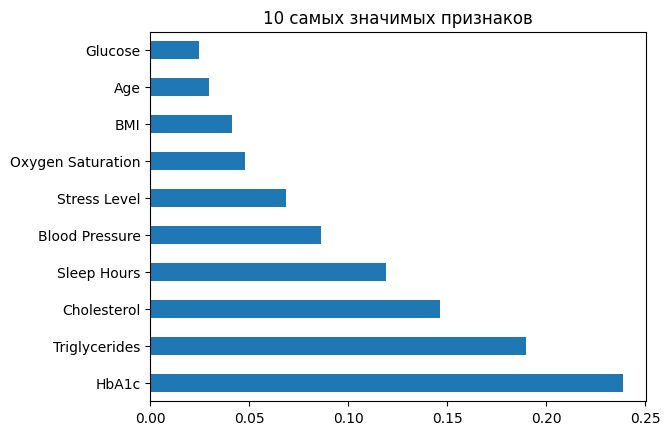

In [36]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('10 самых значимых признаков')
plt.show()

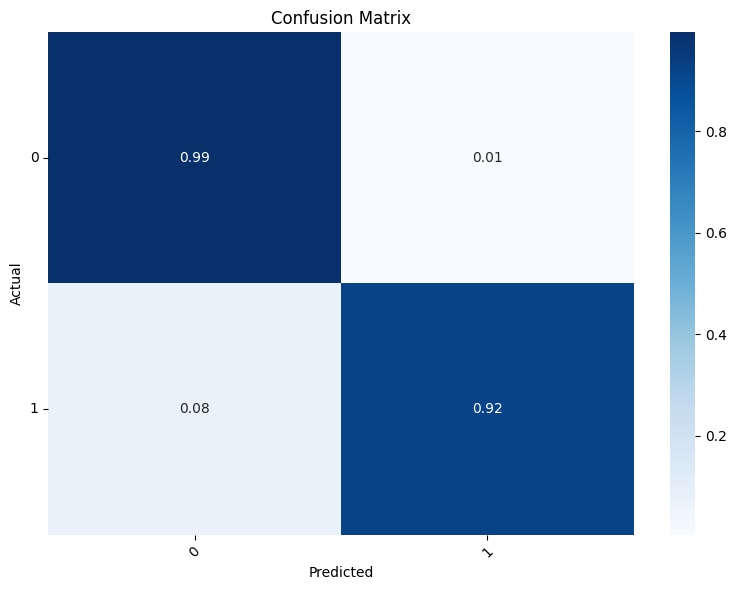

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=(0, 1),
    yticklabels=(0, 1)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## KNN
Устойчив к выбросам. Но плохое определение значимости.

### X и y

In [38]:
X = table_normalized.drop(columns=[prediction_value] + values_too_correlate, errors="ignore")
y = table_normalized[prediction_value]
#y = y.to_numpy()
feature_names = X.columns
#X = X.to_numpy()
N, d = X.shape

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

(N_train, N_test)

(20400, 5100)

In [40]:
pd.DataFrame(y_train).describe()

Healthy
count  20400.000000
mean       0.119167
std        0.323992
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

### Предварительная балансировка

In [41]:
X_train_balanced, y_train_balanced = (X_train, y_train)

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
N_train_balanced, _ = X_train_balanced.shape
(N_train_balanced, N_test)

(35938, 5100)

In [43]:
pd.DataFrame(y_train_balanced).describe()

Healthy
count  35938.000000
mean       0.500000
std        0.500007
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000

### Классификация

In [44]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=20, weights="distance", n_jobs=-1)
neigh.fit(X_train_balanced, y_train_balanced)

y_train_pred = neigh.predict(X_train_balanced)
y_test_pred = neigh.predict(X_test)

### Оценка

In [45]:
err_train = np.mean(y_train_balanced != neigh.predict(X_train_balanced))
err_test = np.mean(y_test != neigh.predict(X_test))

print(err_train, err_test)

0.0 0.04098039215686274


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      4492
           1       0.74      1.00      0.85       608

    accuracy                           0.96      5100
   macro avg       0.87      0.98      0.91      5100
weighted avg       0.97      0.96      0.96      5100



In [47]:
np.sum(rf.feature_importances_)

np.float64(1.0)

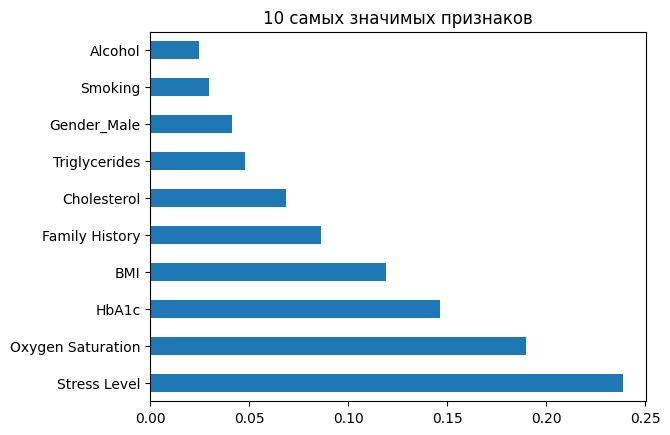

In [48]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('10 самых значимых признаков')
plt.show()

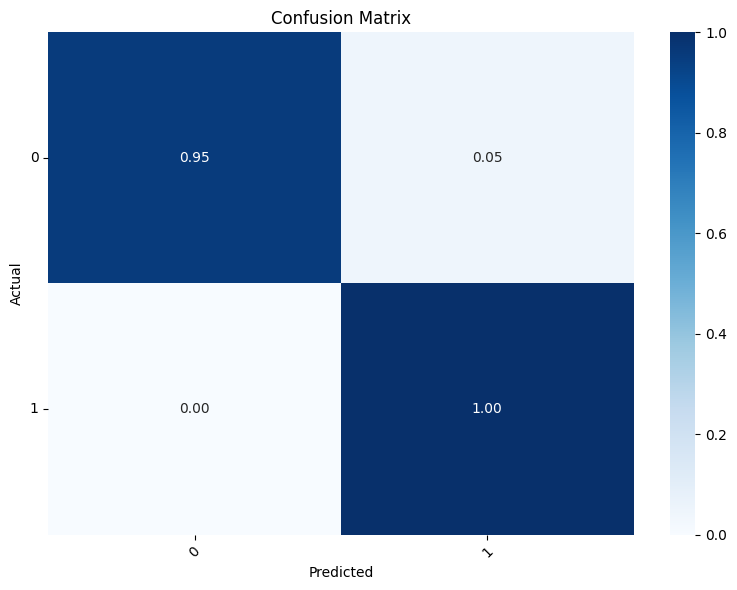

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=(0, 1),
    yticklabels=(0, 1)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Gradient Boosting
Будет хорошо работать, поскольку немного признаков и достаточно много наблюдений. Устойчив к выбросам.

### X и y

In [50]:
X = table.drop(columns=[prediction_value] + values_too_correlate, errors="ignore")
y = table[prediction_value]
#y = y.to_numpy()
feature_names = X.columns
#X = X.to_numpy()
N, d = X.shape

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

(N_train, N_test)

(20400, 5100)

In [52]:
pd.DataFrame(y_train).describe()

Healthy
count  20400.000000
mean       0.119167
std        0.323992
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

### Предварительная балансировка

In [53]:
X_train_balanced, y_train_balanced = (X_train, y_train)

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
N_train_balanced, _ = X_train_balanced.shape
(N_train_balanced, N_test)

(35938, 5100)

In [55]:
pd.DataFrame(y_train_balanced).describe()

Healthy
count  35938.000000
mean       0.500000
std        0.500007
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000

### Классификация

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
gb.fit(X_train_balanced, y_train_balanced)

y_train_pred = gb.predict(X_train_balanced)
y_test_pred = gb.predict(X_test)

### Оценка

In [57]:
err_train = np.mean(y_train_balanced != gb.predict(X_train_balanced))
err_test = np.mean(y_test != gb.predict(X_test))

print(err_train, err_test)

0.0012243307919194168 0.012941176470588235


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4492
           1       0.93      0.96      0.95       608

    accuracy                           0.99      5100
   macro avg       0.96      0.98      0.97      5100
weighted avg       0.99      0.99      0.99      5100



In [59]:
np.sum(rf.feature_importances_)

np.float64(1.0)

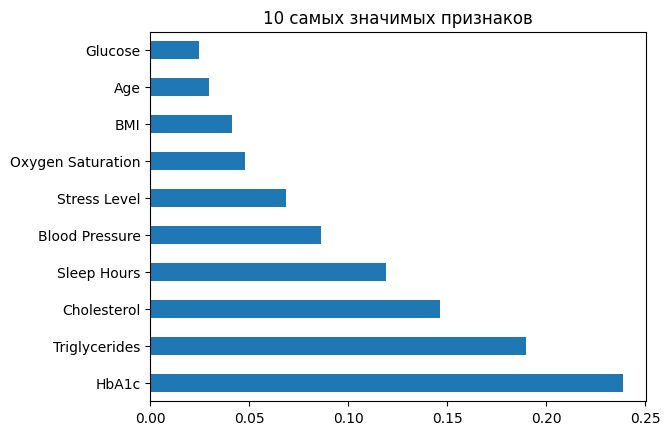

In [60]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh')
plt.title('10 самых значимых признаков')
plt.show()

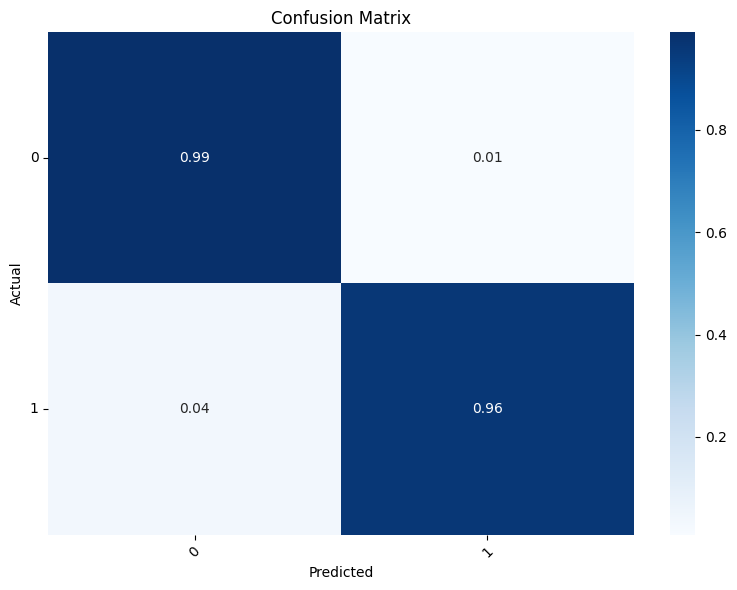

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, normalize="true")

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=(0, 1),
    yticklabels=(0, 1)
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Вывод
Gradient Boosting, KNN и Random Forest показали отличные результаты. Поскольку нам важна метрика recall для класса 0 (верно предсказано, что человек нездоров), выходит, что результат у KNN хуже остальных. Также у Random Forest немного хуже recall для класса 1 (то есть хуже предсказывает, что человек здоров).

Выходит, что в этой задаче лучше всего подойдёт Gradient Boosting.
